##Analyzing a confession

###A simple computational analysis of the 03/01/06 Brendan Dassey confession

For questions: s.wubben@uvt.nl

In [120]:
# coding=utf-8

from wordcloud import WordCloud
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt
from nltk.util import ngrams

tknzr = TweetTokenizer()
%matplotlib inline 


#count unique words, ngrams
def seenWords(t,wlist):
    count=0
    for token in t:
        if token not in wlist:
            wlist.append(token)
            count+=1
    return(count,wlist)

#init lists
brendan=[]
wieg=[]
fass=[]
br_counts=[0]
w_counts=[0]
fb_counts=[0]
br_counts2=[0]
w_counts2=[0]
fb_counts2=[0]
br_counts3=[0]
w_counts3=[0]
fb_counts3=[0]
words=[]
bigrams=[]

#open file
with open("BDassey01Mar2006Transcript.txt", encoding='utf-8') as f:
    lines=f.readlines()

    
#count stuff
for i in lines:
    t = tknzr.tokenize(i)
    t2=ngrams(t,2)
    try:
        count, words = seenWords(t,words)
        count2, bigrams = seenWords(t2,bigrams)
        
        if t[0] =='BRENDAN':
            brendan.extend(t[1:])
            br_counts.append(len(t[1:])+br_counts[len(br_counts)-1])
            fb_counts.append(fb_counts[len(fb_counts)-1])
            w_counts.append(w_counts[len(w_counts)-1])
            
            br_counts2.append(count+br_counts2[len(br_counts2)-1])
            fb_counts2.append(fb_counts2[len(fb_counts2)-1])
            w_counts2.append(w_counts2[len(w_counts2)-1])
            
            br_counts3.append(count2+br_counts3[len(br_counts3)-1])
            fb_counts3.append(fb_counts3[len(fb_counts3)-1])
            w_counts3.append(w_counts3[len(w_counts3)-1])
            
        elif t[0] =='FASSBENDER':
            fass.extend(t[1:])
            br_counts.append(br_counts[len(br_counts)-1])
            fb_counts.append(len(t[1:])+fb_counts[len(fb_counts)-1])
            w_counts.append(w_counts[len(w_counts)-1])
            
            br_counts2.append(br_counts2[len(br_counts2)-1])
            fb_counts2.append(count+fb_counts2[len(fb_counts2)-1])
            w_counts2.append(w_counts2[len(w_counts2)-1])
            
            br_counts3.append(br_counts3[len(br_counts3)-1])
            fb_counts3.append(count2+fb_counts3[len(fb_counts3)-1])
            w_counts3.append(w_counts3[len(w_counts3)-1])
            
        elif t[0] =='WIEGERT':
            wieg.extend(t[1:])
            br_counts.append(br_counts[len(br_counts)-1])
            fb_counts.append(fb_counts[len(fb_counts)-1])
            w_counts.append(len(t[1:])+w_counts[len(w_counts)-1])
            
            br_counts2.append(br_counts2[len(br_counts2)-1])
            fb_counts2.append(fb_counts2[len(fb_counts2)-1])
            w_counts2.append(count+w_counts2[len(w_counts2)-1])
            
            br_counts3.append(br_counts3[len(br_counts3)-1])
            fb_counts3.append(fb_counts3[len(fb_counts3)-1])
            w_counts3.append(count2+w_counts3[len(w_counts3)-1])
    except:
        pass


Generating the word clouds

(-0.5, 399.5, 199.5, -0.5)

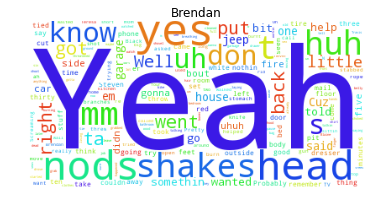

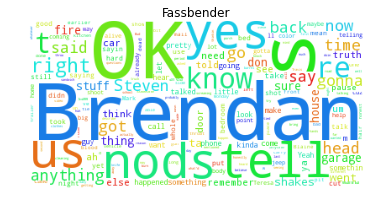

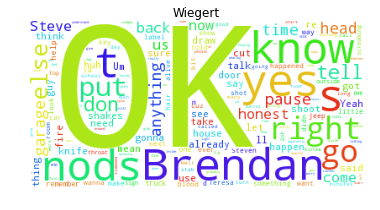

In [122]:

wordcloud_br = WordCloud(background_color="white").generate(br)
wordcloud_fb = WordCloud(background_color="white").generate(fb)
wordcloud_w = WordCloud(background_color="white").generate(w)


plt.figure()
plt.title('Brendan')
plt.imshow(wordcloud_br)
plt.axis("off")
plt.figure()
plt.title('Fassbender')
plt.imshow(wordcloud_fb)
plt.axis("off")
plt.figure()
plt.title('Wiegert')
plt.imshow(wordcloud_w)
plt.axis("off")

Looking at the total number of words uttered in the interview

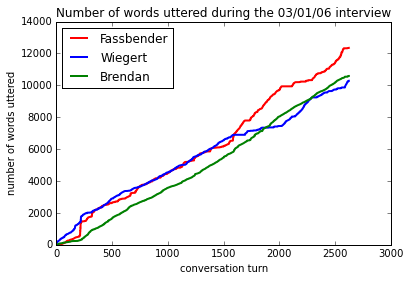

In [114]:
plt.figure()
plt.plot(fb_counts, color='r',linewidth=2, label='Fassbender')
plt.plot(w_counts, color='b',linewidth=2, label='Wiegert')
plt.plot(br_counts, color='g',linewidth=2, label='Brendan')
plt.ylabel('number of words uttered')
plt.xlabel('conversation turn')
plt.title('Number of words uttered during the 03/01/06 interview')
plt.legend(loc=0)
plt.show()

But what about *unique* words? We are after all only interested in new information

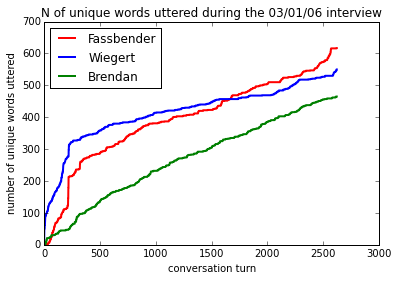

In [115]:
plt.figure()
plt.plot(fb_counts2, color='r', linewidth=2, label='Fassbender')
plt.plot(w_counts2, color='b', linewidth=2, label='Wiegert')
plt.plot(br_counts2, color='g', linewidth=2, label='Brendan')
plt.ylabel('number of unique words uttered')
plt.xlabel('conversation turn')
plt.title('N of unique words uttered during the 03/01/06 interview')
plt.legend(loc=0)
plt.show()

But there are only so many words which can be used in many different combinations, so let's look at bigrams: sequences of two words

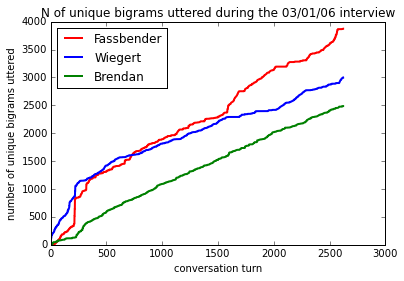

In [116]:
plt.figure()
plt.plot(fb_counts3, color='r', linewidth=2, label='Fassbender')
plt.plot(w_counts3, color='b', linewidth=2, label='Wiegert')
plt.plot(br_counts3, color='g', linewidth=2, label='Brendan')
plt.ylabel('number of unique bigrams uttered')
plt.xlabel('conversation turn')
plt.title('N of unique bigrams uttered during the 03/01/06 interview')
plt.legend(loc=0)
plt.show()